# Loading in the libraries.

In [99]:
# Old libraries that we know and love.
import numpy as np
import matplotlib.pylab as py
import pandas as pa
%matplotlib notebook

# Our new libraries.
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()

# Looking at the data

In [100]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [101]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [102]:
X = iris['data']
y = iris['target']

<IPython.core.display.Javascript object>


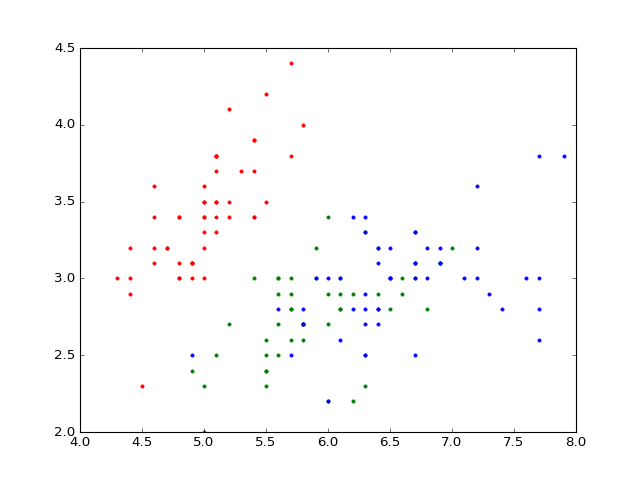

In [103]:
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y==1,0],X[y==1,1],'g.')
py.plot(X[y==2,0],X[y==2,1],'b.')

<IPython.core.display.Javascript object>


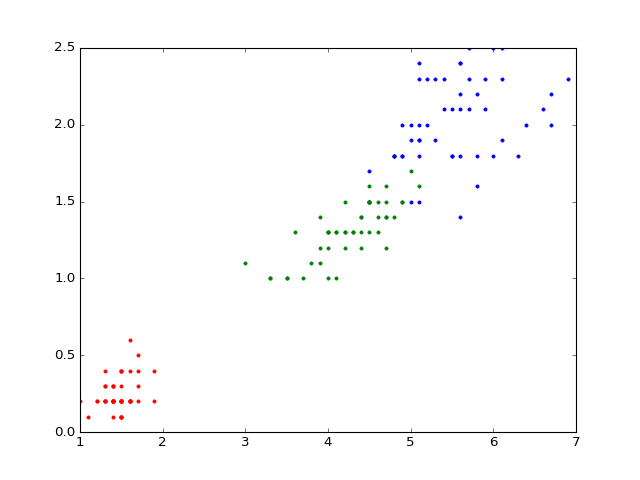

In [104]:
py.plot(X[y==0,2],X[y==0,3],'r.')
py.plot(X[y==1,2],X[y==1,3],'g.')
py.plot(X[y==2,2],X[y==2,3],'b.')

<IPython.core.display.Javascript object>


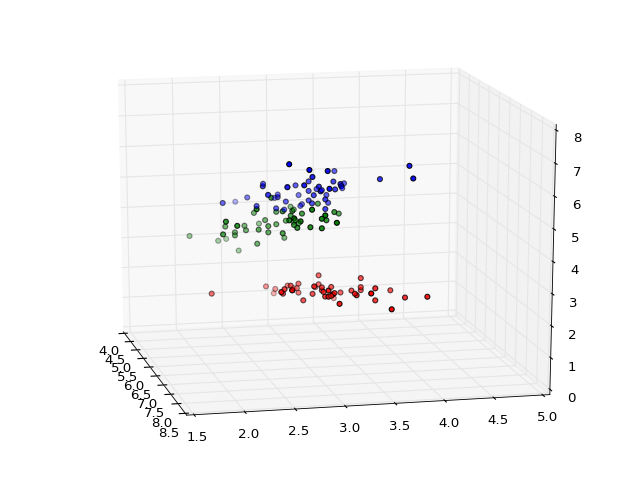

In [105]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], c='r')
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], c='g')
ax.scatter(X[y==2, 0], X[y==2, 1], X[y==2, 2], c='b')
py.show()

Is there a more principled way to look at the data?  Yes!  <b>Let's go back to the notes.</b>

# More principled ways to look at the data, Principle Component Analysis (PCA)!

Some sample data to demonstrate PCA on.

In [109]:
mu1 = np.array([0,0,0])
mu2 = np.array([6,0,0])
np.random.seed(123)
Sigma = np.matrix(np.random.normal(size=[3,3]))
# U,E,VT = np.linalg.svd(Sigma)
# E[0] = 1
# E[1] = 1
# E[2] = 1
# Sigma = U*np.diag(E)*VT
Xrandom1 = np.random.multivariate_normal(mu1,np.array(Sigma*Sigma.T),size=500)
Xrandom2 = np.random.multivariate_normal(mu2,np.array(Sigma*Sigma.T),size=500)

Can do the same thing with our classification data.

<IPython.core.display.Javascript object>


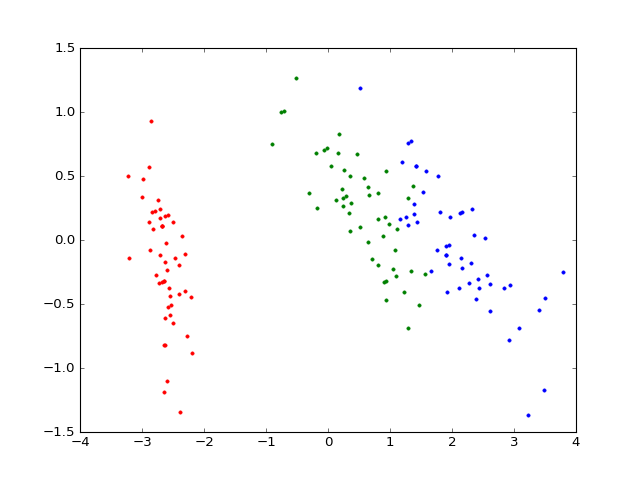

In [110]:
from sklearn.decomposition import PCA

X2D = PCA(n_components=3).fit_transform(X)
py.plot(X2D[y==0,0],X2D[y==0,1],'r.')
py.plot(X2D[y==1,0],X2D[y==1,1],'g.')
py.plot(X2D[y==2,0],X2D[y==2,1],'b.')

Just as one can project from a high dimensional space to a two-dimensional space, one can also do the same thing to project to a three-dimensional space.

<IPython.core.display.Javascript object>


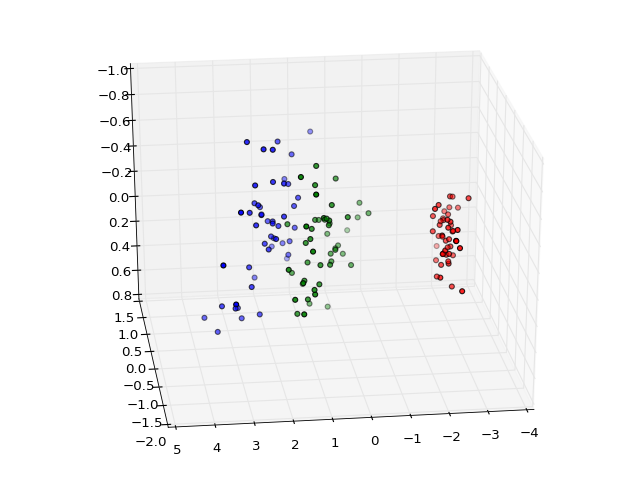

In [111]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X3D = PCA(n_components=3).fit_transform(X)
ax.scatter(X3D[y==0, 0], X3D[y==0, 1], X3D[y==0, 2], c='r')
ax.scatter(X3D[y==1, 0], X3D[y==1, 1], X3D[y==1, 2], c='g')
ax.scatter(X3D[y==2, 0], X3D[y==2, 1], X3D[y==2, 2], c='b')
py.show()

<b>Let's go back to the notes for our first algorithm.</b>

# Our first classification tool, Linear Support Vector Machines.

In [112]:
# Load in the support vector machine (SVM) library
from sklearn import svm

In [113]:
# If there is one thing that I want to harp on, it is the difference
# between testing and training errors!  So, here we create a training
# set on which we computer the parameters of our algorithm, and a 
# testing set for seeing how well we generalize (and work on real 
# world problems).
np.random.seed(1236)
perm = np.random.permutation(len(y))
trainSize = 100
Xtrain = X[perm[:trainSize],0:2]
Xtest = X[perm[trainSize:],0:2]

yHat = np.zeros([len(y)])

# Exists a separator
#yHat[np.logical_or(y==1,y==2)] = 1
# No perfect separator
#yHat[np.logical_or(y==1,y==0)] = 1
# All the data
yHat = y 

yHattrain = yHat[perm[:trainSize]]
yHattest = yHat[perm[trainSize:]]

## ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^  <p><font color="red">But why do you do this? See the notes.</font> 

In [114]:
# Some parameters we can get to play with
# If there is no perfect separator then how much do you penalize points
# that lay on the wrong side?
C = 100.
# The shape of the loss function for points that lay on the wrong side.
loss = 'l2'

In [115]:
# Run the calculation!
clf = svm.LinearSVC(loss=loss,C=C)
clf.fit(Xtrain, yHattrain)

C:\Users\randy\Anaconda3\lib\site-packages\sklearn\svm\classes.py:197: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<IPython.core.display.Javascript object>


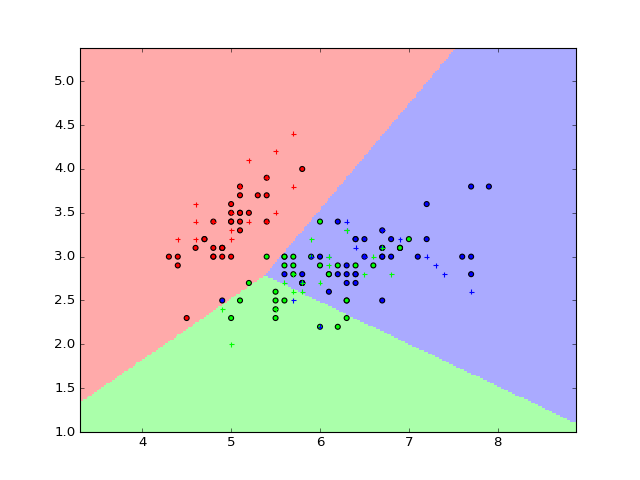

In [116]:
# Make some plots, inspired by scikit-learn tutorial
from matplotlib.colors import ListedColormap

# step size in the mesh for plotting the decision boundary.
h = .02  
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [36]:
# Print out some metrics
print('training score',clf.score(Xtrain,yHattrain))
print('testing score',clf.score(Xtest,yHattest))

training score 0.76
testing score 0.7


<b>Back to the notes to define our next method.</b>

# Our second classification tool, K-nearest neighbors.

In [117]:
# Import the K-NN solver
from sklearn import neighbors

In [118]:
# If there is one thing that I want to harp on, it is the difference
# between testing and training errors!  So, here we create a training
# set on which we computer the parameters of our algorithm, and a 
# testing set for seeing how well we generalize (and work on real 
# world problems).
np.random.seed(123)
perm = np.random.permutation(len(y))
trainSize = 50
Xtrain = X[perm[:trainSize],0:2]
Xtest = X[perm[trainSize:],0:2]

ytrain = y[perm[:trainSize]]
ytest = y[perm[trainSize:]]

In [119]:
# Some parameters to play around with

# The number of neighbors to use.
n_neighbors = 7

#weights = 'distance'
weights = 'uniform'

In [120]:
# Run the calculation
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

<IPython.core.display.Javascript object>


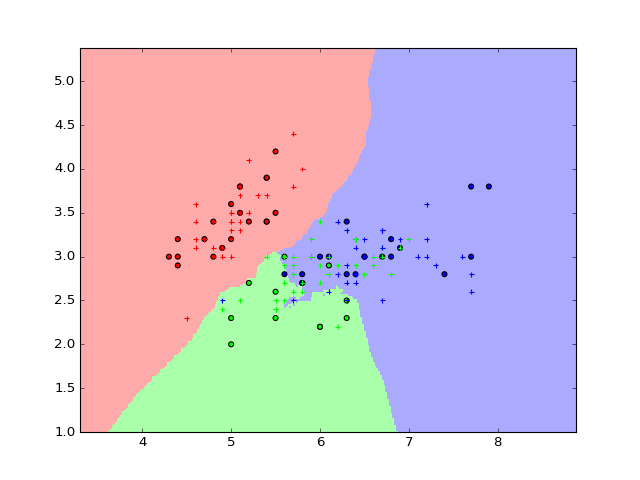

In [121]:
# Make some plots inspired by sci-kit learn tutorial

# step size in the mesh for plotting the decision boundary.
h = .02  

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=cmap_bold,marker='o')
py.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, cmap=cmap_bold,marker='+')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [42]:
# Print out some scores.
print('training score',clf.score(Xtrain,ytrain))
print('testing score',clf.score(Xtest,ytest))

training score 0.9
testing score 0.69


<b>Back to the notes.</b>

## Loading in the libraries for regression.

In [43]:
# Old libraries that we know and love.
import numpy as np
import matplotlib.pylab as py
import pandas as pa

# Our new libraries.
from sklearn import cross_validation, linear_model, feature_selection, metrics

# Supervised Regression

## Linear Regression

In [44]:
# Read in the data using 
Xy = pa.read_csv('Advertising.csv')

In [45]:
# Take a look at the contents.
Xy

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [46]:
# Normalize data
# We do this to make plotting and processing easier.  Many Sklearn functions do this
# for you behind the scenes, but we do it explicitly.
# Note, that this is a cousing of the physics idea of nondimensionalization.  Think
# about the case where TV was measured in millions, while Radio was measured in
# thousands.  One could imagine TV totally washing out the effect of Radio.
# In effect, after normalization, each predictor now stands on an "even footing".
#
# Is this always a good idea?
Xy = (Xy-Xy.min())/(Xy.max()-Xy.min())
Xy

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0.000000,0.775786,0.762097,0.605981,0.807087
1,0.005025,0.148123,0.792339,0.394019,0.346457
2,0.010050,0.055800,0.925403,0.606860,0.303150
3,0.015075,0.509976,0.832661,0.511873,0.665354
4,0.020101,0.609063,0.217742,0.510994,0.444882
5,0.025126,0.027054,0.985887,0.656992,0.220472
6,0.030151,0.192087,0.661290,0.204046,0.401575
7,0.035176,0.404126,0.395161,0.099384,0.456693
8,0.040201,0.026716,0.042339,0.006157,0.125984
9,0.045226,0.673318,0.052419,0.183817,0.354331


In [47]:
# Select out our predictor columns and our response columns
X = Xy.ix[:,['TV']]
y = Xy.ix[:,['Sales']]

In [48]:
# Last time we did this by hand, now we are smarter and use the sklearn 
# routine.  This routine splits data into training and testing subsets.
cross_validation.train_test_split([1,2,3,4,5],
                                  [6,7,8,9,10],
                                  test_size=0.4,
                                  random_state=5)

[[2, 3, 4], [5, 1], [7, 8, 9], [10, 6]]

In [49]:
# Now we do it for the real data.
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8)

In [50]:
# Let's take a quick look at the data.
X_train

,TV
185,0.690903
110,0.761245
27,0.809604
25,0.886710
151,0.406831
122,0.755157
176,0.837673
131,0.894488
138,0.143050
92,0.733852


In [51]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# There are the slope and intercept of the line we computed.
# Beta_0
print(reg.intercept_)
# Beta_1
print(reg.coef_)

[ 0.23925616]
[[ 0.4713251]]


<IPython.core.display.Javascript object>


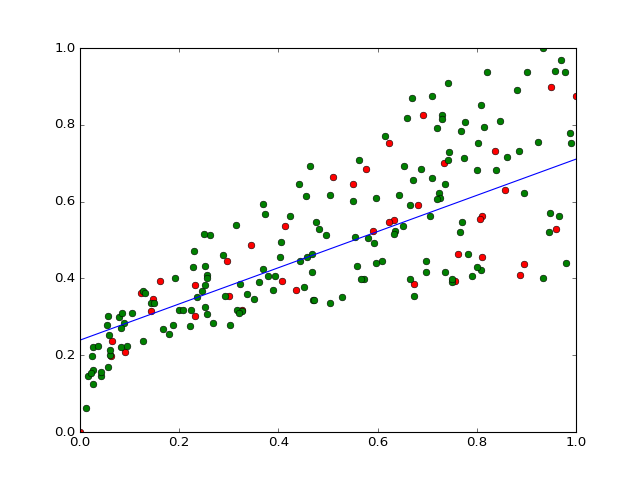

In [54]:
# Do a plot
plotX = np.linspace(0,1,100)
plotY = reg.predict(np.matrix(plotX).T)
py.plot(X_train,y_train,'ro')
py.plot(X_test,y_test,'go')
py.plot(plotX,plotY,'b-')

In [55]:
# Use the metrics package to print our errors.  See discussion on slides.
print('training error')
print(metrics.mean_squared_error(y_train,reg.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,reg.predict(X_test)))

training error
0.01695322439
testing error
0.0171791763591


<b>Back to slides.</b>

## Multi-dimensional regression

In [56]:
# Select out our predictor columns and our response columns
X = Xy.ix[:,['TV','Radio']]
y = Xy.ix[:,['Sales']]

# Select subsets for training and testing
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8,
                                                                  random_state=123)

<IPython.core.display.Javascript object>


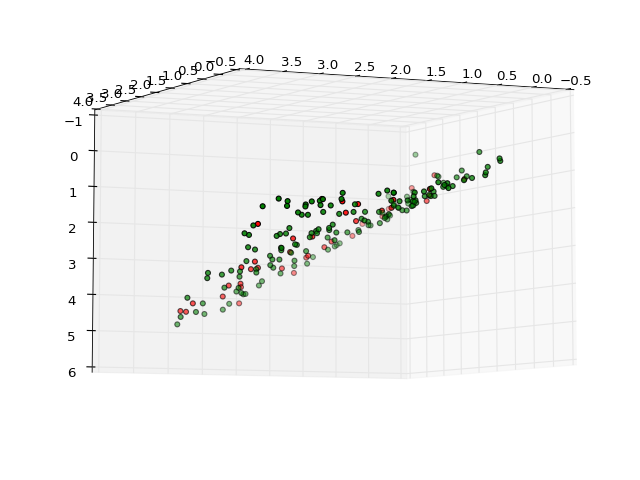

In [58]:
# Plot the data to get a feel for it.
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_train.ix[:,0]/X.ix[:,0].std(), 
           X_train.ix[:,1]/X.ix[:,1].std(), 
           y_train.ix[:,0]/y.ix[:,0].std(), c='r')
ax.scatter(X_test.ix[:,0]/X.ix[:,0].std(), 
           X_test.ix[:,1]/X.ix[:,1].std(), 
           y_test.ix[:,0]/y.ix[:,0].std(), c='g')

py.show()

In [59]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
# Create data for plotting
size=10
xPlot,yPlot = np.meshgrid(np.linspace(0,1,size),
                          np.linspace(0,1,size))
np.array([xPlot.flatten(),yPlot.flatten()])
zPlot = reg.predict(np.transpose(np.array([xPlot.flatten(),
                                           yPlot.flatten()])))
zPlot = zPlot.reshape([size,size])

<IPython.core.display.Javascript object>


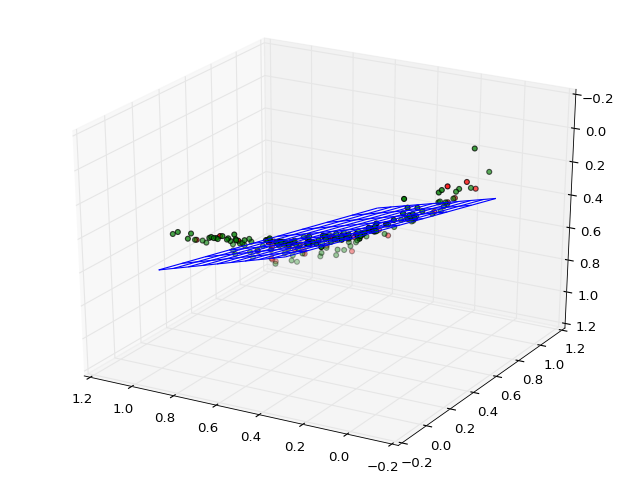

In [63]:
# Since we will be plotting many times, we 
def myPlot(reg,X_train,y_train,X_test,y_test,xPlot,yPlot,zPlot,size=10,scale_factor=0.05):
    fig = py.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X_train.ix[:,0], 
               X_train.ix[:,1], 
               y_train.ix[:,0],
               c='r')
    ax.scatter(X_test.ix[:,0], 
               X_test.ix[:,1], 
               y_test.ix[:,0],
               c='g')
    ax.plot_wireframe(xPlot,yPlot,zPlot)
    py.show
    
myPlot(reg,X_train,y_train,X_test,y_test,xPlot,yPlot,zPlot)

In [64]:
# Use the metrics package to print our errors
print('training error')
print(metrics.mean_squared_error(y_train,reg.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,reg.predict(X_test)))

training error
0.00301813848558
testing error
0.00529973748665


<b>Back to the notes.</b>

## Non-linear fitting

In [65]:
# Now we try non-linear fittng.  See notes for details.  
# Note that we add a new column which is a *non-linear* function
# of the original data!
XyNonlinear = Xy.copy()
XyNonlinear['TV*Radio'] = Xy['TV']*Xy['Radio']

# Select out our predictor columns and our response columns
X = XyNonlinear.ix[:,['TV','Radio','TV*Radio']]
y = XyNonlinear.ix[:,['Sales']]

# Select subsets for training and testing
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,
                                                                  y,
                                                                  test_size=0.8,
                                                                  random_state=123)

In [66]:
# Run the solver
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# Create data for plotting
size = 10

xPlot,yPlot = np.meshgrid(np.linspace(0,1,size),
                          np.linspace(0,1,size))
zPlot = reg.predict(np.transpose(np.array([xPlot.flatten(),
                                           yPlot.flatten(),
                                           (xPlot*yPlot).flatten()])))
zPlot = zPlot.reshape([size,size])

<IPython.core.display.Javascript object>


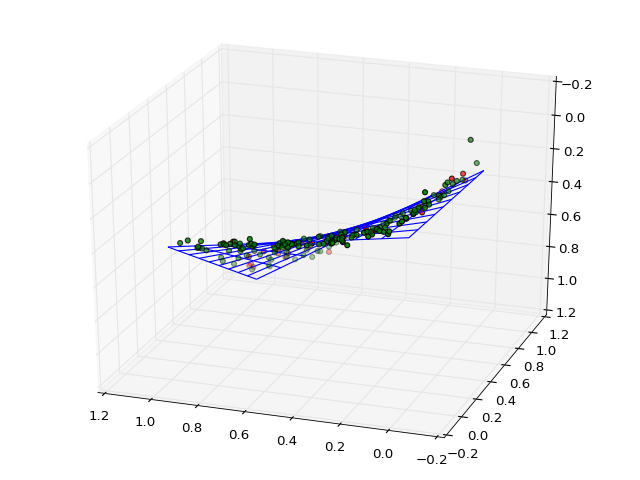

In [68]:
myPlot(reg,X_train,y_train,X_test,y_test,xPlot,yPlot,zPlot)

In [69]:
# Use the metrics package to print our errors
print('training error')
print(metrics.mean_squared_error(y_train,reg.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,reg.predict(X_test)))

training error
0.000954956008276
testing error
0.00149444601649



<b>Back to the notes.</b>

## Too much of a good thing...

In [70]:
# What about adding many non-linear combinations!  See notes for details.

degree=5
XCrazy = np.zeros([Xy.shape[0],degree**2])

for i in range(degree):
    for j in range(degree):
        XCrazy[:,i*degree + j] = (Xy['TV']**i)*(Xy['Radio']**j)
        
# Select subsets for training and testing
X_train,X_test,y_train,y_test = cross_validation.train_test_split(XCrazy,
                                                                  y,
                                                                  test_size=0.8,
                                                                  random_state=123)

In [71]:
# Run the solver
regOver = linear_model.LinearRegression(fit_intercept=True)
regOver.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
print(regOver.intercept_)
print(regOver.coef_)

[-6.94708351]
[[    0.            60.55943866  -166.07190604   184.75679655
    -72.32883146    58.42979358  -484.12475428  1297.94802254
  -1408.49267646   538.88687258  -170.96380513  1414.03394472
  -3717.84399465  3955.89719898 -1483.95231005   216.5849254  -1787.88418168
   4651.20425448 -4892.06944797  1814.15721399  -100.38566969   829.9610831
  -2151.36644689  2254.46299284  -833.66782309]]


In [74]:
# Create data for plotting
size = 10

xPlot,yPlot = np.meshgrid(np.linspace(0,1,size),
                          np.linspace(0,1,size))

tmp = []
for i in range(degree):
    for j in range(degree):
        tmp.append( ( (xPlot**i)*(yPlot**j) ).flatten() )

zPlot = regOver.predict(np.transpose(np.array(tmp)))
zPlot = zPlot.reshape([size,size])

<IPython.core.display.Javascript object>


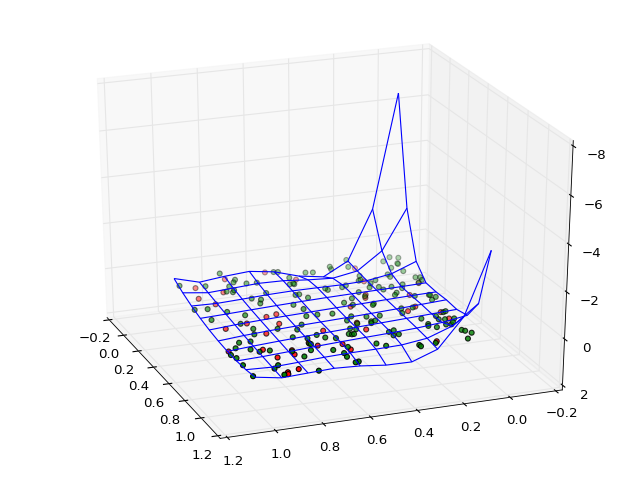

In [75]:
# Plot the data

# Select subsets for training and testing
X_train_plot,X_test_plot = cross_validation.train_test_split(Xy.ix[:,['TV','Radio']],
                                                             test_size=0.8,
                                                             random_state=123)

myPlot(reg,X_train_plot,y_train,X_test_plot,y_test,xPlot,yPlot,zPlot)

In [76]:
# Use the metrics package to print our errors
print('training error')
print(metrics.mean_squared_error(y_train,regOver.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,regOver.predict(X_test)))

training error
3.41438151089e-05
testing error
0.348469042539


<b>Back to notes.</b>

## Model Selection

In [77]:
# Fortunately, there is a *lot* that one can do to help.  It is possible to have
# many predictors but still get good answers.  See notes for details...
degree=5
XCrazy = np.zeros([Xy.shape[0],degree**2])

names = []
for i in range(degree):
    for j in range(degree):
        XCrazy[:,i*degree + j] = (Xy['TV']**i)*(Xy['Radio']**j)
        names.append('TV**%d*Radio**%d'%(i,j))

# Select subsets for training and testing
X_train,X_test,y_train,y_test = cross_validation.train_test_split(XCrazy,
                                                                  y,
                                                                  test_size=0.8,
                                                                  random_state=123)

In [78]:
# We can try None and 3 to see what we get.
selector = feature_selection.RFE(regOver,n_features_to_select=3)
selector.fit(X_train,y_train)

C:\Users\randy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  estimator_params=None, n_features_to_select=3, step=1, verbose=0)

In [80]:
# Print out the predictors we use.  These are the predictors selection by the RFE algorithm
# as the most important.
for i in range(len(names)):
    print(names[i],)
    print(selector.get_support()[i])

TV**0*Radio**0
False
TV**0*Radio**1
False
TV**0*Radio**2
False
TV**0*Radio**3
False
TV**0*Radio**4
False
TV**1*Radio**0
False
TV**1*Radio**1
False
TV**1*Radio**2
False
TV**1*Radio**3
False
TV**1*Radio**4
False
TV**2*Radio**0
False
TV**2*Radio**1
True
TV**2*Radio**2
False
TV**2*Radio**3
False
TV**2*Radio**4
False
TV**3*Radio**0
False
TV**3*Radio**1
False
TV**3*Radio**2
False
TV**3*Radio**3
True
TV**3*Radio**4
True
TV**4*Radio**0
False
TV**4*Radio**1
False
TV**4*Radio**2
False
TV**4*Radio**3
False
TV**4*Radio**4
False


In [81]:
# Create data for plotting
size = 10

xPlot,yPlot = np.meshgrid(np.linspace(0,1,size),
                          np.linspace(0,1,size))

tmp = []
for i in range(degree):
    for j in range(degree):
        tmp.append( ( (xPlot**i)*(yPlot**j) ).flatten() )

zPlot = selector.predict(np.transpose(np.array(tmp)))
zPlot = zPlot.reshape([size,size])

<IPython.core.display.Javascript object>


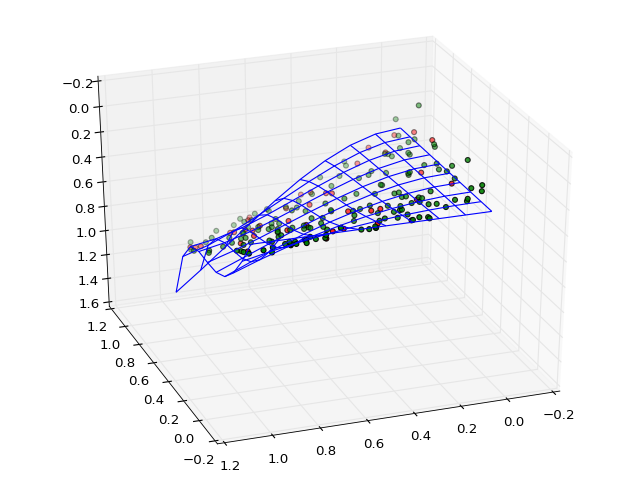

In [82]:
# Plot the data

# Select subsets for training and testing
X_train_plot,X_test_plot = cross_validation.train_test_split(Xy.ix[:,['TV','Radio']],
                                                             test_size=0.8,
                                                             random_state=123)
myPlot(reg,X_train_plot,y_train,X_test_plot,y_test,xPlot,yPlot,zPlot)

In [36]:
# Use the metrics package to print our errors
print 'training error'
print metrics.mean_squared_error(y_train,selector.predict(X_train))
print 'testing error'
print metrics.mean_squared_error(y_test,selector.predict(X_test))

training error
0.00265007247837
testing error
0.00490752683194


<b>Back to notes.</b>

## Lasso!

In [83]:
# Lasso regression is another method for doing feature selection.
# It is, by far, by favorite it is a close cousin of my personal
# research topic.  See notes for details...
degree=5
XCrazy = np.zeros([Xy.shape[0],degree**2])

names = []
for i in range(degree):
    for j in range(degree):
        XCrazy[:,i*degree + j] = (Xy['TV']**i)*(Xy['Radio']**j)
        names.append('TV**%d*Radio**%d'%(i,j))
                     
# Select subsets for training and testing
X_train,X_test,y_train,y_test = cross_validation.train_test_split(XCrazy,
                                                                  y,
                                                                  test_size=0.8,
                                                                  random_state=123)

In [84]:
# Run the solver
regLasso = linear_model.Lasso(alpha=0.002,fit_intercept=True,normalize=True)
regLasso.fit(X_train,y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
# Print out the predictors we use.  These betas with non-zero weights are those
# selected by the Lasso algorithm as being the most important.  What do you notice?
print(regLasso.intercept_)
for i in range(len(regLasso.coef_)):
    print(names[i],regLasso.coef_[i])

[ 0.27046738]
TV**0*Radio**0 0.0
TV**0*Radio**1 0.0
TV**0*Radio**2 0.0
TV**0*Radio**3 0.0
TV**0*Radio**4 0.0
TV**1*Radio**0 0.135662574951
TV**1*Radio**1 0.670730481986
TV**1*Radio**2 0.0
TV**1*Radio**3 0.0
TV**1*Radio**4 0.0
TV**2*Radio**0 0.0
TV**2*Radio**1 0.0
TV**2*Radio**2 0.0
TV**2*Radio**3 0.0
TV**2*Radio**4 0.0
TV**3*Radio**0 0.0
TV**3*Radio**1 0.0
TV**3*Radio**2 0.0
TV**3*Radio**3 0.0
TV**3*Radio**4 0.0
TV**4*Radio**0 0.0
TV**4*Radio**1 0.0
TV**4*Radio**2 0.0
TV**4*Radio**3 0.0
TV**4*Radio**4 0.0


In [86]:
# Create data for plotting
size = 10

xPlot,yPlot = np.meshgrid(np.linspace(0,1,size),
                          np.linspace(0,1,size))

tmp = []
for i in range(degree):
    for j in range(degree):
        tmp.append( ( (xPlot**i)*(yPlot**j) ).flatten() )

zPlot = regLasso.predict(np.transpose(np.array(tmp)))
zPlot = zPlot.reshape([size,size])

<IPython.core.display.Javascript object>


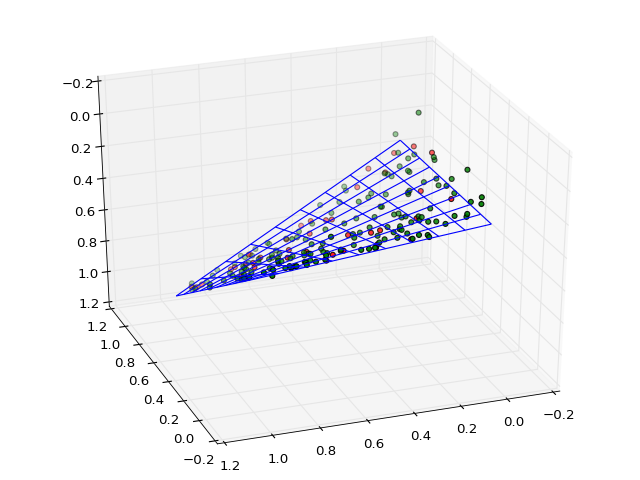

In [87]:
# Plot the data

# Select subsets for training and testing
X_train_plot,X_test_plot = cross_validation.train_test_split(Xy.ix[:,['TV','Radio']],
                                                             test_size=0.8,
                                                             random_state=123)
myPlot(reg,X_train_plot,y_train,X_test_plot,y_test,xPlot,yPlot,zPlot)

In [88]:
# Use the metrics package to print our errors
print('training error')
print(metrics.mean_squared_error(y_train,regLasso.predict(X_train)))
print('testing error')
print(metrics.mean_squared_error(y_test,regLasso.predict(X_test)))

training error
0.00118345029043
testing error
0.002103671494
